# <p style ="padding: 10px; background-color: #192841; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 15px 15px;"> Are Sequels Better Than the Original? </p>

<p style = "text-align: center; font-family : newtimeroman; font-size: 120%;">
<strong> Justin Cheigh and Daisuke Yamada <br>
<strong> DIS Copenhagen, Spring 2023 <br> 
<strong> Computational Analysis of Big Data: Final Project </p>

In this project, we seek to answer the question of whether sequels are better than the original. To this end, we implement and train a **bidirectional-LSTM** using Keras and TensorFlow and perform **Sentiment Analysis** on reviews of pariticular movie series to investigate what the trend of each series looks like as it goes further. Our training dataset comes from <a href="https://www.kaggle.com/datasets/shivam2503/diamonds"> kaggle,</a> and it contains 50,000 movie reviews (as strings) labeled "positive" or "negative". We also scrape movies reviews of the series from IMDb using Python's **selenium** libraray.

# <p style ="padding: 10px; background-color: #192841; color : #F8F8FF; font-family: newtimeroman; font-size: 80%; text-align: center; border-radius : 15px 15px;"> Table of Contents</p> 

|No  | Contents |
|:---| :---     |
|1   | Data Preparation Part 1 |
|2   | Data Preparation Part 2 |
|3   | Implement/Train Model   |
|4   | Model Evaluation        |  
|5   | Collect Sentiment Results by Prediction |         
|6   | Examine Sentiments Part 1 |   
|7   | Examine Sentiments Part 2 |
|8   | Examine Sentiments Part 3 |
|9   | Summary |

# <p style ="padding: 10px; background-color: #192841; color : #F8F8FF; font-family: newtimeroman; font-size: 80%; text-align: center; border-radius : 15px 15px;"> Data Preparation</p> 

### 1. Download stentiment analysis datasets 
We get our training dataset from <a href="https://www.kaggle.com/datasets/shivam2503/diamonds"> kaggle,</a> and store them under */train_data* directory as CSV files.

### 2. Download IMDb datasets 

In this section, we scrape reviews on the four different movie series, **Harry Potter**, **Star Wars**, **Kung Fu Panda**, and **Cars**, from IMBd using *Selenium* Libraray. 

#### 2.1 Libraraies

In [2]:
import numpy as np
import pandas as pd
from scrapy.selector import Selector
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.support import ui
import time
from tqdm import tqdm
import warnings
import os.path
warnings.filterwarnings("ignore")

#### 2.2 Get URLs for the movies

In [3]:
# Harry Potter Series
hp0_url = 'https://www.imdb.com/title/tt0241527/reviews?ref_=tt_urv'
hp1_url = 'https://www.imdb.com/title/tt0295297/reviews?ref_=tt_urv'
hp2_url = 'https://www.imdb.com/title/tt0304141/reviews?ref_=tt_urv'
hp3_url = 'https://www.imdb.com/title/tt0330373/reviews?ref_=tt_urv'
hp4_url = 'https://www.imdb.com/title/tt0373889/reviews?ref_=tt_urv'
hp5_url = 'https://www.imdb.com/title/tt0417741/reviews?ref_=tt_urv'
hp6_url = 'https://www.imdb.com/title/tt0926084/reviews?ref_=tt_urv'
hp7_url = 'https://www.imdb.com/title/tt1201607/reviews?ref_=tt_urv'

# Star Wars
sw0_url = 'https://www.imdb.com/title/tt0120915/reviews?ref_=tt_urv'
sw1_url = 'https://www.imdb.com/title/tt0121765/reviews?ref_=tt_urv'
sw2_url = 'https://www.imdb.com/title/tt0121766/reviews?ref_=tt_urv'
sw3_url = 'https://www.imdb.com/title/tt0076759/reviews?ref_=tt_urv'
sw4_url = 'https://www.imdb.com/title/tt0080684/reviews?ref_=tt_urv'
sw5_url = 'https://www.imdb.com/title/tt0086190/reviews?ref_=tt_urv'
sw6_url = 'https://www.imdb.com/title/tt2488496/reviews?ref_=tt_urv'
sw7_url = 'https://www.imdb.com/title/tt2527336/reviews?ref_=tt_urv'
sw8_url = 'https://www.imdb.com/title/tt2527338/reviews?ref_=tt_urv'

# Kung Fu Panda
kp0_url = 'https://www.imdb.com/title/tt0441773/reviews?ref_=tt_urv'
kp1_url = 'https://www.imdb.com/title/tt1302011/reviews?ref_=tt_urv'
kp2_url = 'https://www.imdb.com/title/tt2267968/reviews?ref_=tt_urv'

# Cars
cars0_url = 'https://www.imdb.com/title/tt0317219/reviews?ref_=tt_urv'
cars1_url = 'https://www.imdb.com/title/tt1216475/reviews?ref_=tt_urv'
cars2_url = 'https://www.imdb.com/title/tt3606752/reviews?ref_=tt_urv'

# aggregate urls
url_dict = {
    'harry_potter': [hp0_url, hp1_url, hp2_url, hp3_url, hp4_url, hp5_url, hp6_url, hp7_url],
    'star_wars': [sw0_url, sw1_url, sw2_url, sw3_url, sw4_url, sw5_url, sw6_url, sw7_url, sw8_url],
    'kung_fu_panda': [kp0_url, kp1_url, kp2_url],
    'cars': [cars0_url, cars1_url, cars2_url]
}

#### 2.3 Extract and save reviews
We use the urls above to extract the reviews and save them as individual CSV files under each directory.

In [22]:
# return reviews, titles, and rating as a dataframe 
def get_df(url):
    # webdriver file
    PATH = r"C:\chromedriver.exe"
    driver = webdriver.Chrome(PATH)
    driver.get(url)

    # create waiter
    wait = ui.WebDriverWait(driver, 10)

    # load pages
    sel = Selector(text = driver.page_source)
    review_counts = sel.css('.lister .header span::text').extract_first().replace(',','').split(' ')[0]
    more_review_pages = int(int(review_counts)/25)
    print(f'there are {review_counts} reviews')
    for _ in tqdm(range(more_review_pages)):
        try:
            driver.find_element(By.ID, 'load-more-trigger').click() 
            time.sleep(2.0)
        except:
            pass

    # get lists
    rating_list = []
    review_title_list = []
    review_list = []
    error_url_list = []
    error_msg_list = []
    reviews = driver.find_elements(By.CSS_SELECTOR, 'div.review-container')

    # cnt = 0
    for d in tqdm(reviews):
        try:
            sel2 = Selector(text = d.get_attribute('innerHTML'))
            # review rating
            try:
                rating = sel2.css('.rating-other-user-rating span::text').extract_first()
            except:
                rating = np.NaN
            # review text
            try:
                review = sel2.css('.text.show-more__control::text').extract_first()
            except:
                review = np.NaN

            # review title
            try:
                review_title = sel2.css('a.title::text').extract_first()
            except:
                review_title = np.NaN

            # append info
            if rating is None:
                rating = np.NaN
            if review_title is None:
                review_title = np.NaN
            if review is None:
                review = np.NaN

            rating_list.append(rating)
            review_title_list.append(review_title[1:-1])
            review_list.append(review.replace('\n', '<br /><br />'))
            if not len(rating_list) == len(review_list) == len(review_title_list):
                review_list.append(' ')
            # cnt += 1

        except Exception as e:
            error_url_list.append(url)
            error_msg_list.append(e)

    # print(len(rating_list), len(review_title_list), len(review_list), cnt)

    # convert to df
    review_df = pd.DataFrame({
        'Rating': rating_list,
        'Review_Title': review_title_list,
        'Review': review_list
    })
    return review_df

# convert df to csv
def save_csv(df, filepath):
    df.to_csv(filepath)

# scrape
for series, urls in url_dict.items():
    print(f'Processing {series}...')
    index = 0
    for url in urls:
        filepath = f'./reviews/original/{series}/{index}.csv'
        try:
            f = open(filepath)
            f.close()
            print(f'{filepath} already exists')
        except FileNotFoundError:
            print(f'working on {filepath}...')
            review_df = get_df(url=url)
            save_csv(df=review_df, filepath=filepath)
        index += 1

Processing harry_potter...
./reviews/original/harry_potter/0.csv already exists
./reviews/original/harry_potter/1.csv already exists
./reviews/original/harry_potter/2.csv already exists
./reviews/original/harry_potter/3.csv already exists
./reviews/original/harry_potter/4.csv already exists
./reviews/original/harry_potter/5.csv already exists
./reviews/original/harry_potter/6.csv already exists
./reviews/original/harry_potter/7.csv already exists
Processing star_wars...
./reviews/original/star_wars/0.csv already exists
./reviews/original/star_wars/1.csv already exists
./reviews/original/star_wars/2.csv already exists
./reviews/original/star_wars/3.csv already exists
./reviews/original/star_wars/4.csv already exists
./reviews/original/star_wars/5.csv already exists
./reviews/original/star_wars/6.csv already exists
./reviews/original/star_wars/7.csv already exists
./reviews/original/star_wars/8.csv already exists
Processing kung_fu_panda...
./reviews/original/kung_fu_panda/0.csv already 

# <p style ="padding: 10px; background-color: #192841; color : #F8F8FF; font-family: newtimeroman; font-size: 80%; text-align: center; border-radius : 15px 15px;"> Build Bidirectional LSTM</p> 

In this section, we aim to implement a bidirectional LSTM from scratch using Keras and TensorFlow. We use pre-trained **GloVe** word embedding (saved under *./glove*) to define an embedding layer and incorporate it into our model to achieve higher accuracy. 

### 3. Implemenet and Train Bidirectional LSTM

#### 3.1 Libraraies

In [1]:
# python files
import data

# data analysis libraries 
import numpy as np
import pandas as pd
import pickle

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# tensorflow/keras 
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Bidirectional, LSTM, Dropout, Dense, Embedding
from keras.losses import BinaryCrossentropy
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# warning and other config
import warnings
warnings.filterwarnings('ignore')
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

2023-04-26 18:53:48.766761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daisukeyamada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 3.2 GPU seeting and hyper-parameters

In [2]:
# device setting
gpu_device = tf.test.gpu_device_name()
cpu_device = '/cpu:0'
device = cpu_device

# hyper parameters
batch_size = 100
epochs = 5

#### 3.3 Preprocess train, test, and validation data

In [3]:
with tf.device(device):
    # read csv files
    dataset = pd.concat([pd.read_csv("./train_data/train.csv"), pd.read_csv("./train_data/test.csv")], ignore_index=True)

    # parse texts
    text = data.parse_texts(dataset['text'])

    # mapping: {positive, negative} -> {1, 0}
    label_encoder = LabelEncoder()
    dataset["sentiment"] = label_encoder.fit_transform(dataset["sentiment"])

    # split data into training, test, and validation
    x_train, x_test, y_train, y_test = train_test_split(text, dataset['sentiment'], train_size=0.8, random_state=101)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.7, random_state=101)
    print(f'Found {len(x_train)} train data')
    print(f'Found {len(x_test)} test data')
    print(f'Found {len(x_val)} validation data')

    # tokenize datasets
    num_words = max([len(t.split()) for t in text], key=int)
    tokenizer = Tokenizer(num_words = num_words, oov_token="<OOV>") 
    tokenizer.fit_on_texts(text)
    word_index = tokenizer.word_index
    print(f'Found {len(word_index)} words')

    # save tokenizer
    with open('./tokenizer/tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

    # process each dataset with tokenizer
    seqlen = 200
    process = lambda data, seqlen: pad_sequences(tokenizer.texts_to_sequences(data), maxlen=seqlen, padding="post", truncating="post")
    x_train, x_test, x_val = process(x_train, seqlen), process(x_test, seqlen), process(x_val, seqlen)

Found 40000 train data
Found 7000 test data
Found 3000 validation data
Found 99274 words


We create data.py that does the same thing as above so that we can access the code outside this notebook.

#### 3.4 Define embedding layer with GloVe Embeddings

In [120]:
with tf.device(device):
    # load GloVe embeddings
    embedding = {}
    with open('./glove/glove.6B.200d.txt') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vec = np.asarray(values[1:], dtype='float32')
            embedding[word] = vec

    print(f'Found {len(embedding)} words in embedding space')

    # create embedding matrix
    embedding_matrix = np.zeros((len(word_index)+1, seqlen))

    for word, i in word_index.items():
        if word in embedding:
            vec = embedding[word]
            embedding_matrix[i] = vec
    print(f'Found matrix of shape {embedding_matrix.shape}')

    # define pre-trained embedding layer
    pre_emb = Embedding(
        input_dim=len(word_index)+1, 
        output_dim=seqlen, 
        weights=[embedding_matrix], 
        input_length=seqlen, 
        trainable=True
    )

    # define trainable embedding layer 
    emb = Embedding(
        input_dim=len(word_index)+1, 
        output_dim=128, 
        input_length=seqlen
    )

Found 400000 words in embedding space
Found matrix of shape (99275, 200)


#### 3.5 Define and compile Bidirectional LSTM

In [121]:
with tf.device(device):
    # define bidirectional LSTM
    model = Sequential([
        pre_emb,
        Bidirectional(LSTM(128, return_sequences=True)), 
        Dropout(0.2),
        Bidirectional(LSTM(64)),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ])

    # compile
    model.compile(
        loss=BinaryCrossentropy(from_logits=True),
        optimizer='adam',
        metrics=['accuracy']
    )

#### 3.6 Train and save Bidirectional LSTM

In [122]:
with tf.device(device):
    # fit 
    model.fit(
        x_train, 
        y_train, 
        batch_size=batch_size, 
        epochs=epochs, 
        validation_data=(x_val, y_val), 
        validation_split=0.2,
    )

    # save
    model.save('./saved_models/lstm')

Epoch 1/5
400/400 [==============================] - 395s 980ms/step - loss: 0.4919 - accuracy: 0.7625 - val_loss: 0.3666 - val_accuracy: 0.8383
Epoch 2/5
400/400 [==============================] - 391s 978ms/step - loss: 0.3601 - accuracy: 0.8495 - val_loss: 0.3559 - val_accuracy: 0.8477
Epoch 3/5
400/400 [==============================] - 388s 969ms/step - loss: 0.3133 - accuracy: 0.8693 - val_loss: 0.3239 - val_accuracy: 0.8600
Epoch 4/5
400/400 [==============================] - 387s 969ms/step - loss: 0.2897 - accuracy: 0.8807 - val_loss: 0.3346 - val_accuracy: 0.8577
Epoch 5/5
400/400 [==============================] - 388s 970ms/step - loss: 0.2801 - accuracy: 0.8834 - val_loss: 0.3099 - val_accuracy: 0.8670


INFO:tensorflow:Assets written to: ./saved_models/lstm/assets


INFO:tensorflow:Assets written to: ./saved_models/lstm/assets


### 4. Evaluate our LSTM model on testing data

#### 4.1 Load and evaluate LSTM

In [4]:
with tf.device(device):
    # load model
    lstm = load_model('saved_models/lstm', compile=False)
    lstm.compile(
        loss=BinaryCrossentropy(),
        optimizer='adam',
        metrics=['accuracy']
    )

    # evaluate
    score = lstm.evaluate(x_test, y_test)
    print('Test loss :', score[0])
    print('Test accuracy :', score[1])

219/219 [==============================] - 20s 83ms/step - loss: 0.3089 - accuracy: 0.8689
Test loss : 0.30888357758522034
Test accuracy : 0.8688571453094482


# <p style ="padding: 10px; background-color: #192841; color : #F8F8FF; font-family: newtimeroman; font-size: 80%; text-align: center; border-radius : 15px 15px;"> Run Bidirectional LSTM on the IMDb reviews to predict and collect seniments</p> 

### 5. Use Bidirectional LSTM to get sentiments for the movies with sequals

#### 5.1 Libraraies

In [45]:
import data
import pandas as pd
import numpy as np
from keras import models, losses

#### 5.2 Load and compile Bidirectional LSTM

In [46]:
# load the model
lstm = models.load_model('./saved_models/lstm', compile=False)

# compile the model
lstm.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

#### 5.3 Pre-process data

In [47]:
# funtion to get x for a specific series
def get_x(series, num):
    x_list = []
    df_list = []
    for index in range(num):
        path = f'./reviews/original/{series}/{index}.csv'
        df = pd.read_csv(path)
        texts = data.parse_texts(df['Review'])
        x, _ = data.preprocess_x(texts, 200, False)
        # append
        df_list.append(df)
        x_list.append(x)
    return x_list, df_list 

x_hp, df_hp = get_x('harry_potter', 8)
x_sw, df_sw = get_x('star_wars', 9)
x_kp, df_kp = get_x('kung_fu_panda', 3)
x_cars, df_cars = get_x('cars', 3)

#### 5.4 Make prediction of sentiments

In [48]:
def predict_sentiments(x_series, df_series, num):
    df_list = []
    for index in range(num):
        x = x_series[index]
        pred = [1 if i > 0.5 else 0 for i in lstm.predict(x, verbose=False)]
        df = pd.DataFrame ({
            'Rating': list(df_series[index]['Rating'].values),
            'Review': list(df_series[index]['Review'].values),
            'Sentiment': pred
        })
        # append 
        df_list.append(df)
    return df_list

annotated_df_hp = predict_sentiments(x_hp, df_hp, 8)
annotated_df_sw = predict_sentiments(x_sw, df_sw, 9)
annotated_df_kp = predict_sentiments(x_kp, df_kp, 3)
annotated_df_cars = predict_sentiments(x_cars, df_cars, 3)

def save_annotated_df(annotated_df_series, num, series_name):
    for index in range(num):
        df = annotated_df_series[index]
        df.to_csv(f'reviews/annotated/{series_name}/{index}.csv')

# save to csv's
save_annotated_df(annotated_df_hp, 8, 'harry_potter')
save_annotated_df(annotated_df_sw, 9, 'star_wars')
save_annotated_df(annotated_df_kp, 3, 'kung_fu_panda')
save_annotated_df(annotated_df_cars, 3, 'cars')

# <p style ="padding: 10px; background-color: #192841; color : #F8F8FF; font-family: newtimeroman; font-size: 80%; text-align: center; border-radius : 15px 15px;"> Examine the sentiments predicted by our Bidirectional LSTM</p> 

#### 6. What is the relationship between star ratings and sentiment?

#### 6.1 Libraraies 

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import math
import matplotlib.patches as mpatches


#### 6.2 Compare Ratings vs. Sentiments

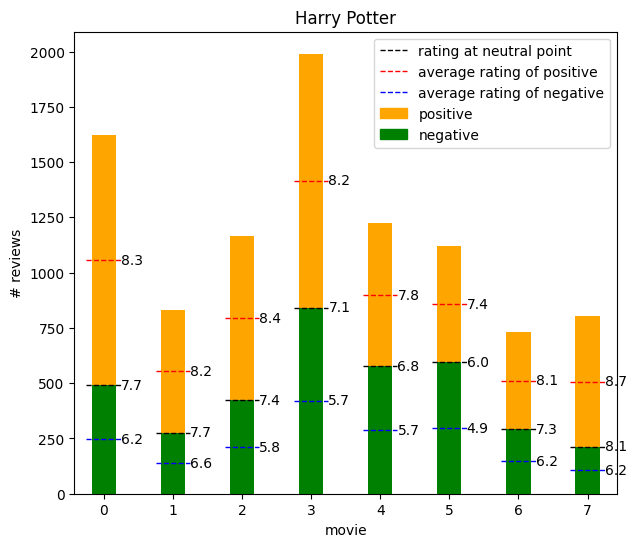

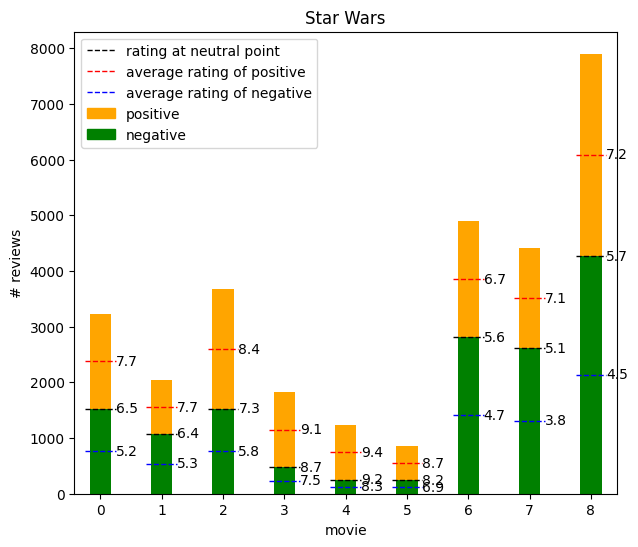

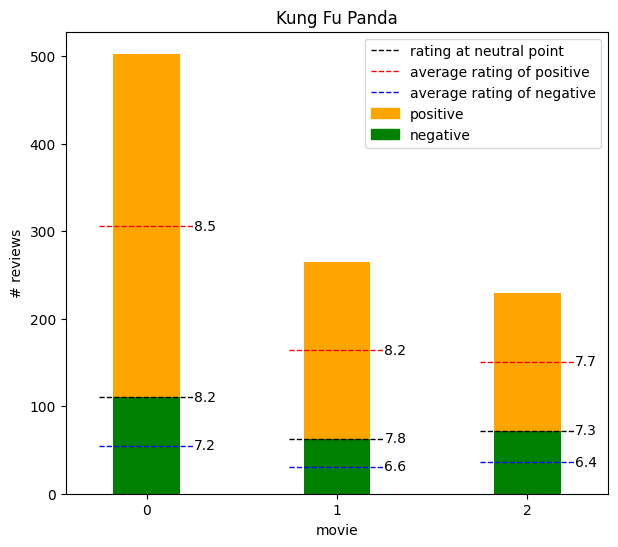

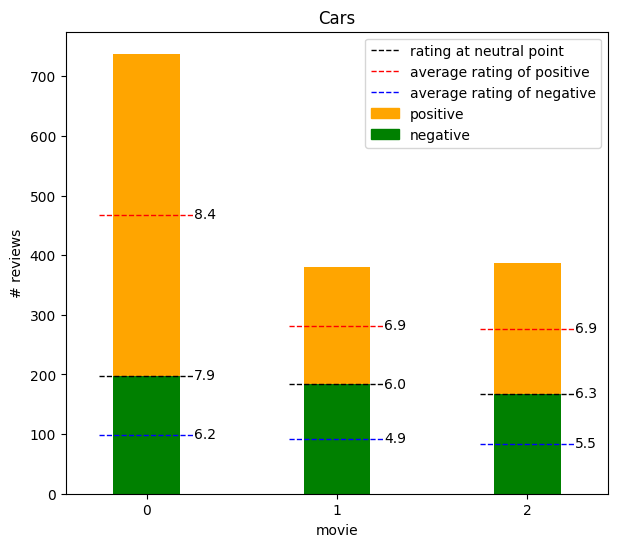

In [50]:
def get_dist(csv_path):
    # retrieve data
    df = pd.read_csv(csv_path)
    ratings = list(df['Rating'].values)
    sentiments = list(df['Sentiment'].values)
    # make lists
    rating_dist = [ratings.count(i) for i in range(1, 11)]
    sentiment_dist = [0 for _ in range(2)]
    sentiment_nan_dist = [0 for _ in range(2)]

    for i in range(df.shape[0]):
        r = ratings[i]
        s = sentiments[i]
        if math.isnan(r):
            sentiment_nan_dist[s] += 1
        else:
            sentiment_dist[s] += 1
    return np.array(rating_dist), np.array(sentiment_dist), np.array(sentiment_nan_dist)

def df_dist(series, num):
    r_list = []
    s_list = []
    s_nan_list = []
    for i in range(num):
        path = f'./reviews/annotated/{series}/{i}.csv'
        name = [str(i)]
        r, s, s_nan = get_dist(path)
        r_list.append([*name, *r])
        s_list.append([*name, *s])
        s_nan_list.append([*name, *s_nan])
    rating_df = pd.DataFrame(
        r_list,
        columns=['movie', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
    )
    sentiment_df = pd.DataFrame(
        s_list,
        columns=['movie', 'neg', 'pos']
    )
    sentiment_nan_df = pd.DataFrame(
        s_nan_list,
        columns=['movie', 'neg', 'pos']
    )
    return rating_df, sentiment_df, sentiment_nan_df

def get_average_ratings(series, num):
    average_rating_whole = []
    average_rating_pos = []
    average_rating_neg = []

    for i in range(num):
        path = f'./reviews/annotated/{series}/{i}.csv'
        df = pd.read_csv(path)
        sum_pos, cnt_pos, sum_neg, cnt_neg = 0, 0, 0, 0
        for j in range(df.shape[0]):
            r, s = list(df['Rating'].values)[j], list(df['Sentiment'].values)[j]
            if not math.isnan(r):
                if s == 0:
                    sum_neg += int(r)
                    cnt_neg += 1
                else:
                    sum_pos += int(r)
                    cnt_pos += 1
        average_rating_whole.append(round((sum_pos+sum_neg)/(cnt_pos+cnt_neg), 1))
        average_rating_pos.append(round(sum_pos/cnt_pos, 1))
        average_rating_neg.append(round(sum_neg/cnt_neg, 1))
    
    return average_rating_whole, average_rating_pos, average_rating_neg

def plot_dist(dfs, title, num, avg_ratings):
    dfs[1].plot(x='movie', kind='bar', rot=0, stacked=True, figsize=(7, 6), position=0.5, width=0.35, color=['green','orange'], legend=False)
    plt.title(title)

    # width of each horizontal lines
    xmin = [i-0.25 for i in range(num)]
    xmax = [i+0.25 for i in range(num)]

    # y positions of the horizontal lines
    y = list(dfs[1]['neg'].values)
    neg_y = [i//2 for i in y]
    pos_y = [y[i] + list(dfs[1]['pos'].values)[i]//2 for i in range(len(list(dfs[1]['pos'].values)))]
    
    # entire average
    plt.hlines(y=y, xmin=xmin, xmax=xmax, color='k', linestyle='dashed', lw=1)
    for i in range(num):
        plt.text(xmax[i], y[i], avg_ratings[0][i], ha ='left', va ='center')

    # positive average
    plt.hlines(y=pos_y, xmin=xmin, xmax=xmax, color='red', linestyle='dashed', lw=1)
    for i in range(num):
        plt.text(xmax[i], pos_y[i], avg_ratings[1][i], ha ='left', va ='center')

    # negative average
    plt.hlines(y=neg_y, xmin=xmin, xmax=xmax, color='blue', linestyle='dashed', lw=1)
    for i in range(num):
        plt.text(xmax[i], neg_y[i], avg_ratings[2][i], ha ='left', va ='center')

    # config
    pos_patch = mpatches.Patch(color='orange', label='positive')
    neg_patch = mpatches.Patch(color='green', label='negative')
    plt.legend(
        handles=[
            Line2D([0], [0], color='black', linestyle='dashed', linewidth=1, label='rating at neutral point'),
            Line2D([0], [0], color='red', linestyle='dashed', linewidth=1, label='average rating of positive'), 
            Line2D([0], [0], color='blue', linestyle='dashed', linewidth=1, label='average rating of negative'), 
            pos_patch, 
            neg_patch])
    plt.ylabel('# reviews')
    plt.show()

# plot
plot_dist(df_dist('harry_potter', 8), 'Harry Potter', 8, get_average_ratings('harry_potter', 8))
plot_dist(df_dist('star_wars', 9), 'Star Wars', 9, get_average_ratings('star_wars', 9))
plot_dist(df_dist('kung_fu_panda', 3), 'Kung Fu Panda', 3, get_average_ratings('kung_fu_panda', 3))
plot_dist(df_dist('cars', 3), 'Cars', 3, get_average_ratings('cars', 3))

#### 6.3 Sentiments for reviews without ratings

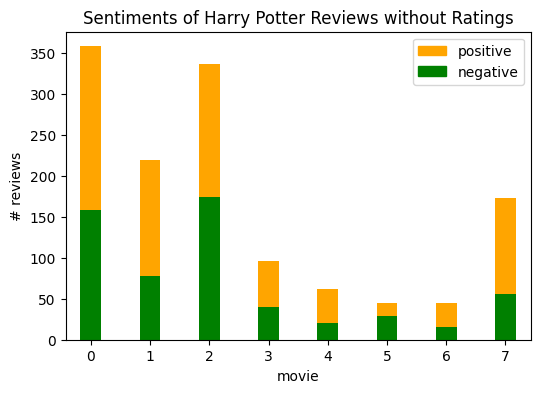

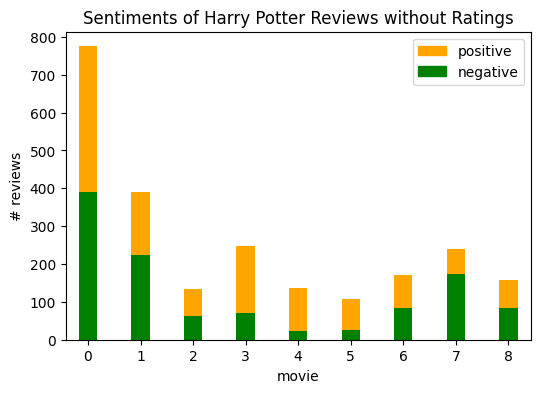

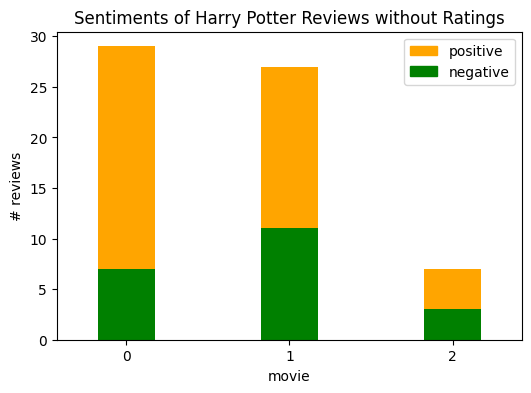

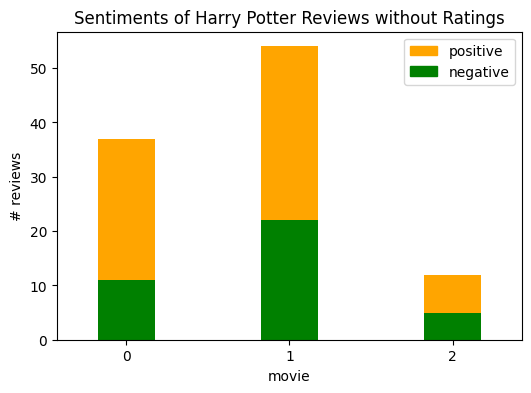

In [51]:
# get non-sentiment df's
_, _, hp_sentiment_nan_df = df_dist('harry_potter', 8)
_, _, sw_sentiment_nan_df = df_dist('star_wars', 9)
_, _, kp_sentiment_nan_df = df_dist('kung_fu_panda', 3)
_, _, cars_sentiment_nan_df = df_dist('cars', 3)

# plot
def plot_sentiment_on_nan_reviews(df, title):
    df.plot(x='movie', kind='bar', rot=0, stacked=True, figsize=(6, 4), position=0.5, width=0.35, color=['green','orange'], legend=False)
    plt.title(title)
    pos_patch = mpatches.Patch(color='orange', label='positive')
    neg_patch = mpatches.Patch(color='green', label='negative')
    plt.legend(handles=[pos_patch, neg_patch])
    plt.ylabel('# reviews')
    plt.show()

plot_sentiment_on_nan_reviews(hp_sentiment_nan_df, 'Sentiments of Harry Potter Reviews without Ratings')
plot_sentiment_on_nan_reviews(sw_sentiment_nan_df, 'Sentiments of Harry Potter Reviews without Ratings')
plot_sentiment_on_nan_reviews(kp_sentiment_nan_df, 'Sentiments of Harry Potter Reviews without Ratings')
plot_sentiment_on_nan_reviews(cars_sentiment_nan_df, 'Sentiments of Harry Potter Reviews without Ratings')